<a href="https://colab.research.google.com/github/karynaur/Adease/blob/main/Adease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 34 kB/s 
     |████████████████████████████████| 47.6 MB 62 kB/s 


In [6]:
import requests
from bs4 import BeautifulSoup
import cv2
import urllib
import PIL
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',options=options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

**Displaying Ads**

In [ ]:
browser.get("https://digiday.com/media/is-this-the-worst-page-on-the-internet/")

***Incase of error rerun the 3rd cell***

In [ ]:
x=browser.page_source
soup=BeautifulSoup(x,'html.parser')
image=soup.find_all('img')
print('Ad link:',image[0]['src'])

[<img alt="" border="0" height="250" src="https://amgs5.com/AS/www/images/897940d74142e5b6380066c08e5b6d13.jpg" title="" width="300"/>, <img alt="" height="0" src="https://amgs5.com/AS/www/delivery/lg.php?bannerid=1123&amp;campaignid=854&amp;zoneid=431&amp;loc=https%3A%2F%2Fgadgets.ndtv.com%2Fgames%2Fnews%2Fnetflix-night-school-studio-acquisition-mobile-games-launch-spain-italy-oxenfree-2557424&amp;cb=2ab0d3bd93" style="width: 0px; height: 0px;" width="0"/>, <img alt="" border="0" height="1" src="https://pixel.adsafeprotected.com/rfw/st/684197/56725812/skeleton.gif?gdpr=${GDPR}&amp;gdpr_consent=${GDPR_CONSENT_278}&amp;gdpr_pd=${GDPR_PD}" width="1"/>, <img src="https://tracker.samplicio.us/tracker/07dce3a2-8004-4138-9148-f440d9c711d8/pixel.gif?sid=6331069&amp;pid=312006180&amp;crid=156934016&amp;device_id=ENTER_MOBILE_AD_ID_MACRO&amp;gdpr=${GDPR}&amp;gdpr_consent=${GDPR_CONSENT_508}&amp;gdpr_pd=${GDPR_PD}&amp;cachebuster=2ab0d3bd93"/>]

Ad link: https://amgs5.com/AS/www/images/897940d74

In [2]:
def process_image(iamge_name, lang_code):
	return pytesseract.image_to_string(Image.open(iamge_name), lang=lang_code)

def print_data(data):
	print(data)

def output_file(filename, data):
	file = open(filename, "w+")
	file.write(data)
	file.close()

***Extracting Image of Extracted Ads***

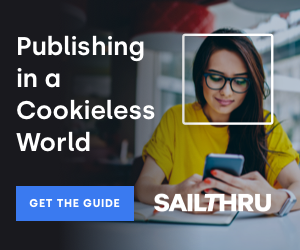

In [3]:
img = PIL.Image.open("sample.png")
img

Tried Word Extraction using Tesseract didnt work


***Using easyocr for text extraction***

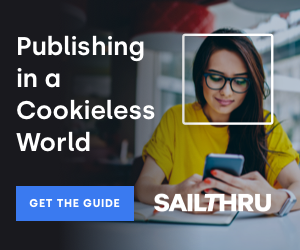

In [35]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/sample.png")
im

In [28]:
import easyocr
reader = easyocr.Reader(['en'])

In [34]:
bounds = reader.readtext('/content/sample.png')
bounds

[([[12, 26], [152, 26], [152, 67], [12, 67]],
  'Publishing',
  0.9328727153683785),
 ([[12, 64], [64, 64], [64, 94], [12, 94]], 'in a', 0.9648513197898865),
 ([[14, 96], [158, 96], [158, 124], [14, 124]],
  'Cookieless',
  0.9999488063222876),
 ([[14, 128], [96, 128], [96, 158], [14, 158]], 'World', 0.9999645474358487),
 ([[29, 197], [123, 197], [123, 211], [29, 211]],
  'GET ThE GUIdE',
  0.3824204968950172),
 ([[150, 188], [276, 188], [276, 218], [150, 218]],
  'SAILTHRU',
  0.9995196045669813)]

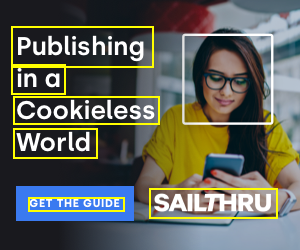

In [37]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)